# Logistic Regression


## In this notebook, we will perform logistic regression and then evaluate the model's performance.

### Logistic Regression is a method used for classification of data. It estimates posterior probabilities (the probability that the data point belongs to a class) and based on that it classifies the data point. 

### Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay, RocCurveDisplay,PrecisionRecallDisplay

### Load the data

In [2]:
train_data = pd.read_csv('../data/train.csv')
val_data = pd.read_csv('../data/val.csv')
test_data = pd.read_csv('../data/test.csv')


### Preparing for training and validation

In [3]:
def preprocessing(train_data,val_data):
    '''
    Does some preprocessing of the data before performing logistic regression.
    ---
    Arguments: 
    train_data (DataFrame): training data 
    val_data (DataFrame): validation data
    
    Returns: 
    X_train (DataFrame): preprocessed training feature matrix
    X_val (DataFrame): preprocessed validation feature matrix
    y_train (Series): training labels
    y_val (Series): validation labels
    
    '''
    X_train = train_data.drop(labels = ['diagnosis','id'],axis = 1) # drop labels and less predictive features for feature matrix
    y_train = train_data['diagnosis']
    X_val = val_data.drop(labels = ['diagnosis','id'],axis = 1)
    y_val = val_data['diagnosis']
    return X_train,X_val,y_train,y_val

X_train,X_val,y_train,y_val = preprocessing(train_data, val_data)

### Built the model and training

In [4]:
model = LogisticRegression(max_iter = 5000)

def logistic_regression(X,y):
    '''
    Fits a logistic regression model to a feature matrix and labels.
    ---
    Arguments: 
    X (DataFrame): feature matrix
    y (Series): feature labels
    
    Returns: 
    fitted logistic regression model to X and y
    
    '''
    return model.fit(X,y)

def logistic_regression_predict(X):
    '''
    Outputs logistic regression labels given a feature matrix X.
    ---
    Arguments: 
    X (DataFrame): feature matrix
    
    Returns:
    y_preds (array): predicted labels for the feature matrix
    
    '''
    return model.predict(X)

# Built the model
logistic_regression(X_train,y_train)

# get the predictions
y_preds = logistic_regression_predict(X_val)

### Function for all the measured metrics

In [5]:
def get_metrics(y_preds,y_val):
    '''
    Gets all the measured metrics including accuracy, precision, recall and F1 score.
    ---
    Arguments:
    y_preds (array): predictions labels
    y_vals (Series): validation labels
    
    Returns: 
    Accuracy (float):Accuracy of the classifier
    Precision (float): Precision of the classifier
    Recall (float): Recall of the classifier
    F1 score (float): F1 score of the classifier

    '''
    print('Accuracy is:', accuracy_score(y_preds,y_val))
    print('Precision is:', precision_score(y_preds,y_val))
    print('Recall is:', recall_score(y_preds,y_val))
    print('F1 score is:' , f1_score(y_preds,y_val))

# get the necessary metrics
get_metrics(y_preds,y_val)

Accuracy is: 0.9278350515463918
Precision is: 0.8857142857142857
Recall is: 0.9117647058823529
F1 score is: 0.8985507246376812


### Creating confusion matrix and Saving it

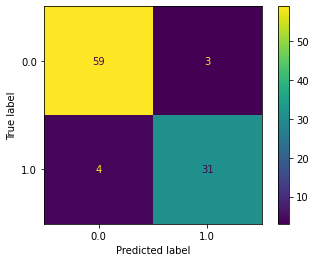

In [6]:
ConfusionMatrixDisplay.from_predictions(y_val,y_preds);
plt.savefig('../figures/confusion_matrix_logistic.png')

### Create the ROC Curve and Saving it

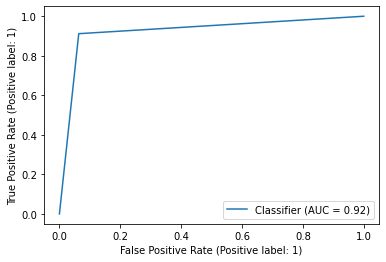

In [9]:
RocCurveDisplay.from_predictions(y_preds,y_val);
plt.savefig('../figures/roc_curve_logistic');

### Create Precision Recall Curve and Saving it

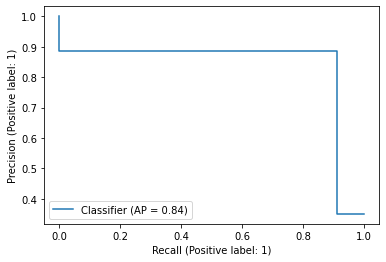

In [10]:
PrecisionRecallDisplay.from_predictions(y_preds,y_val);
plt.savefig('../figures/precision_recall_curve_logistic');